# 데이터 불러오기

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from PIL import Image
import glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


# Data Resize

In [3]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

750  images to be resized.
750  images resized.
가위 이미지 resize 완료!


In [4]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor_test"
resize_images(image_dir_path)

100  images to be resized.
100  images resized.


In [5]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

750  images to be resized.
750  images resized.
바위 이미지 resize 완료!


In [6]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_test"
resize_images(image_dir_path)

100  images to be resized.
100  images resized.


In [7]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

750  images to be resized.
750  images resized.
보 이미지 resize 완료!


In [8]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper_test"
resize_images(image_dir_path)

100  images to be resized.
100  images resized.


In [9]:
def load_data(img_path, number_of_data=2250):  # 가위바위보 이미지 개수 총합에 주의
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 2250 입니다.
x_train shape: (2250, 28, 28, 3)
y_train shape: (2250,)


라벨:  0


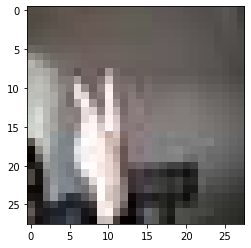

In [10]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

# 딥러닝 네트워크 설계

In [11]:
n_channel_1 = 128
n_channel_2 = 128
n_dense = 256
n_train_epoch = 10

model = keras.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               819456    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 7

# 딥러닝 네트워크 학습

In [12]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs = 10)

Epoch 1/10
71/71 [==============================] - 3s 5ms/step - loss: 1.0512 - accuracy: 0.4227
Epoch 2/10
71/71 [==============================] - 0s 3ms/step - loss: 0.7977 - accuracy: 0.6364
Epoch 3/10
71/71 [==============================] - 0s 3ms/step - loss: 0.6030 - accuracy: 0.7529
Epoch 4/10
71/71 [==============================] - 0s 3ms/step - loss: 0.4303 - accuracy: 0.8333
Epoch 5/10
71/71 [==============================] - 0s 3ms/step - loss: 0.3381 - accuracy: 0.8724
Epoch 6/10
71/71 [==============================] - 0s 3ms/step - loss: 0.2753 - accuracy: 0.8978
Epoch 7/10
71/71 [==============================] - 0s 3ms/step - loss: 0.2146 - accuracy: 0.9191
Epoch 8/10
71/71 [==============================] - 0s 3ms/step - loss: 0.1786 - accuracy: 0.9391
Epoch 9/10
71/71 [==============================] - 0s 3ms/step - loss: 0.1523 - accuracy: 0.9436
Epoch 10/10
71/71 [==============================] - 0s 3ms/step - loss: 0.1268 - accuracy: 0.9569


# 네트워크 테스트

In [13]:
# test data set
def load_data2(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_test, y_test)=load_data2(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [14]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 571.2882 - accuracy: 0.6267
test_loss: 571.2882080078125 
test_accuracy: 0.6266666650772095


# 회고

수집한 가위,바위,보 데이터를 딥러닝으로 학습시켜 가위바위보 분류기를 만들었다. 구글의 teachable machine 사이트에서 데이터를 직접 만들어 수집하고 팀원들과 데이터를 공유했다.

tf.keras의 Sequential API를 이용하여 LeNet이라는 딥러닝 네트워크를 설계했는데 처음 본 모델이라 이해하는 데 시간이 오래 걸렸지만 팀원들과 질문하며 딥러닝의 흐름을 알게 되었다. 그리고 가위바위보 분류기의 정확도를 높이기 위해서 팀원들과 데이터를 공유하면서 많은 양의 데이터를 어떻게 저장해야 할지 어려움을 겪었다. 검색을 통해 파일을 일괄 변경하는 코드를 알게 되었고 중간에 train, test 변수를 잘못 써서 오류가 날 때마다 train 데이터셋와 test 데이터셋에 대한 이해를 높일 수 있었다.

처음 정확도가 나왔을 때는 정확도가 높지 않았다. 그래서 '하이퍼파라미터 조정'과 'train 데이터 갯수 늘리기'를 통해 정확도를 높일 수 있었다. 하이퍼파라미터인 이미지 특징의 갯수와 레이어 갯수를 늘렸더니 정확도를 높아졌다. 그리고 팀원들과 공유 드라이브로 데이터를 교환해서 train 데이터에 추가시켰더니 정확도가 0.6267까지 올라간 것을 확인할 수 있었다.

데이터를 직접 만들고 저장해본 적이 없어서 많이 헤맸지만 검색하면서 노드 이외의 방법을 알게 되어서 새로웠다. 또한 팀원들과 데이터를 어떻게 학습시켰는지 공유하고 정확도를 어떻게 더 올릴지 같이 고민하면서 이 프로젝트에 이해가 많이 올랐던 것 같다. 이미지 학습은 처음이어서 이 프로젝트를 통해 이미지 분류의 흐름을 알 수 있었고 또 다른 이미지 데이터를 이용하기 위해서 어떤 모델로 학습해야 할지도 잘  필요성을 느꼈다.